In [121]:
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

link = 'https://api.opendota.com/api/heroes'
r = requests.get(link)
data = json.loads(r.text)

df = pd.DataFrame(data)
df.head(20)

,id,name,localized_name,primary_attr,attack_type,roles,legs
0,1,npc_dota_hero_antimage,Anti-Mage,agi,Melee,"[Carry, Escape, Nuker]",2
1,2,npc_dota_hero_axe,Axe,str,Melee,"[Initiator, Durable, Disabler, Jungler, Carry]",2
2,3,npc_dota_hero_bane,Bane,int,Ranged,"[Support, Disabler, Nuker, Durable]",4
3,4,npc_dota_hero_bloodseeker,Bloodseeker,agi,Melee,"[Carry, Disabler, Jungler, Nuker, Initiator]",2
4,5,npc_dota_hero_crystal_maiden,Crystal Maiden,int,Ranged,"[Support, Disabler, Nuker, Jungler]",2
5,6,npc_dota_hero_drow_ranger,Drow Ranger,agi,Ranged,"[Carry, Disabler, Pusher]",2
6,7,npc_dota_hero_earthshaker,Earthshaker,str,Melee,"[Support, Initiator, Disabler, Nuker]",2
7,8,npc_dota_hero_juggernaut,Juggernaut,agi,Melee,"[Carry, Pusher, Escape]",2
8,9,npc_dota_hero_mirana,Mirana,agi,Ranged,"[Carry, Support, Escape, Nuker, Disabler]",2
9,10,npc_dota_hero_morphling,Morphling,agi,Ranged,"[Carry, Escape, Durable, Nuker, Disabler]",0


# EASY

In [2]:
df['legs'].value_counts().reset_index().rename(columns = {'index' : 'number of legs', 'legs' : 'count heroes'})

,number of legs,count heroes
0,2,97
1,0,14
2,4,8
3,6,3
4,8,1


# NORMAL

In [3]:
df[['primary_attr', 'attack_type']].value_counts().reset_index().rename(columns = { 0 : 'count heroes'})

,primary_attr,attack_type,count heroes
0,int,Ranged,40
1,str,Melee,38
2,agi,Melee,19
3,agi,Ranged,19
4,str,Ranged,4
5,int,Melee,3


Мы нашли с каким типом атаки и основным атрибутом больше всго героев, далее на основании полученных данных выводим список этих героев

In [48]:
df.localized_name[(df['primary_attr'] == 'int') & (df['attack_type'] == 'Ranged')].reset_index(drop=True)

0                    Bane
1          Crystal Maiden
2                    Puck
3            Storm Spirit
4              Windranger
5                    Zeus
6                    Lina
7                    Lion
8           Shadow Shaman
9            Witch Doctor
10                   Lich
11                 Enigma
12                 Tinker
13              Necrophos
14                Warlock
15          Queen of Pain
16          Death Prophet
17                  Pugna
18                 Dazzle
19                Leshrac
20       Nature's Prophet
21            Enchantress
22                 Jakiro
23               Batrider
24                   Chen
25     Ancient Apparition
26                Invoker
27               Silencer
28     Outworld Destroyer
29           Shadow Demon
30                 Rubick
31              Disruptor
32    Keeper of the Light
33                 Visage
34          Skywrath Mage
35                Techies
36                 Oracle
37          Winter Wyvern
38          

# HARD

In [182]:
df_explode =  df.explode('roles').reset_index(drop=True)

## Первая часть 

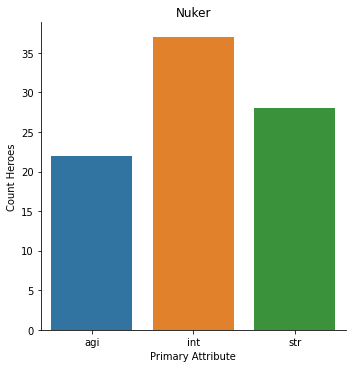

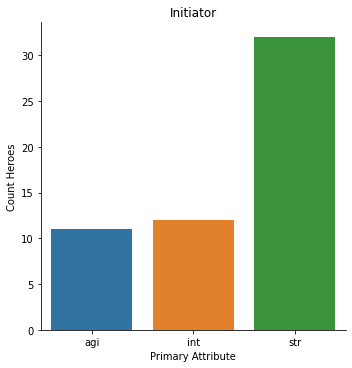

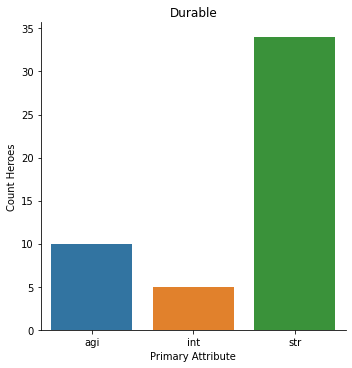

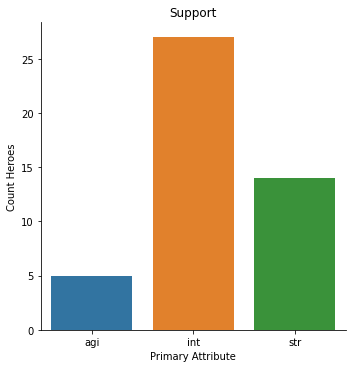

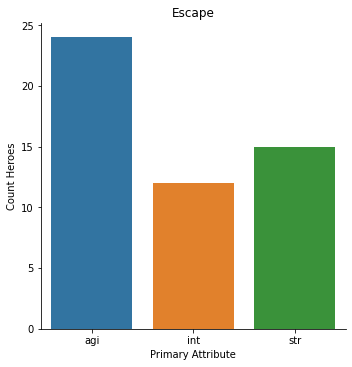

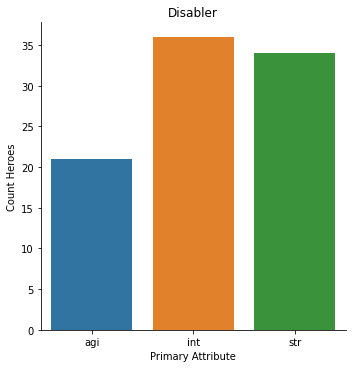

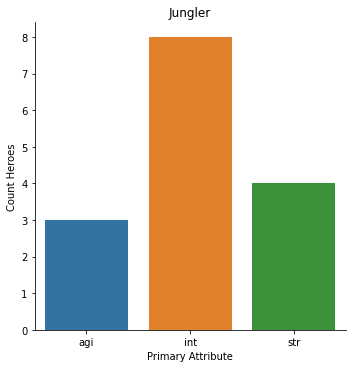

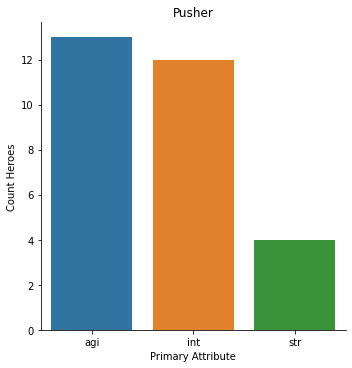

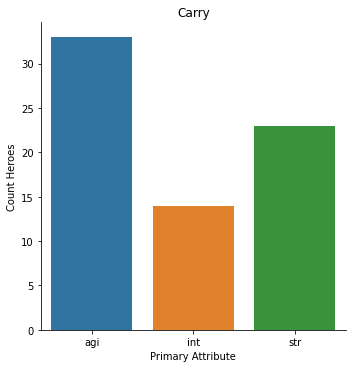

In [183]:
roles_list = list(set(df_explode['roles']))
for i, role_name in enumerate(roles_list):
    df_roles = df_explode[['primary_attr', 'roles']].loc[(df_explode['roles'] == role_name)].value_counts().reset_index().rename(columns = {'primary_attr' : 'Primary Attribute' , 0 : 'Сount Heroes'}).sort_values(by='Primary Attribute')
    role_schedule = sns.catplot(x="Primary Attribute", y="Сount Heroes", data=df_roles, kind="bar").fig.set_size_inches(5,5)
    plt.title(role_name)

## Вторая часть

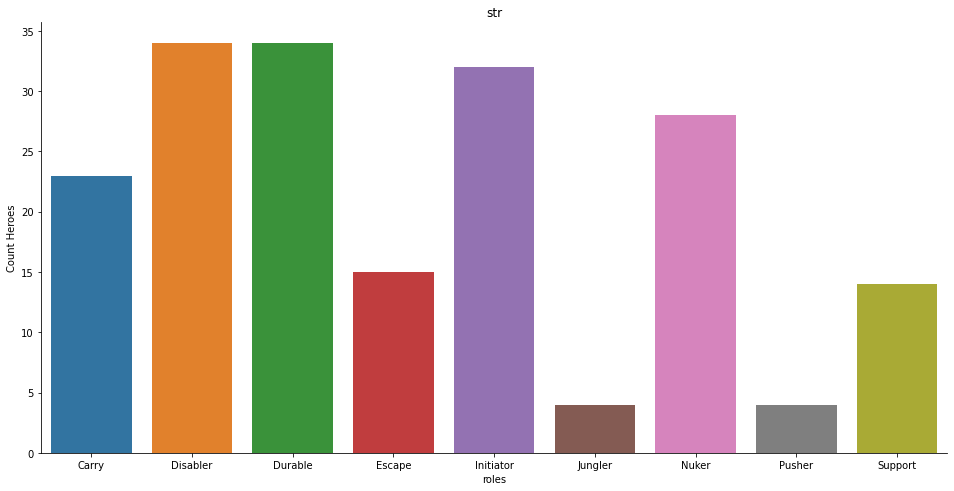

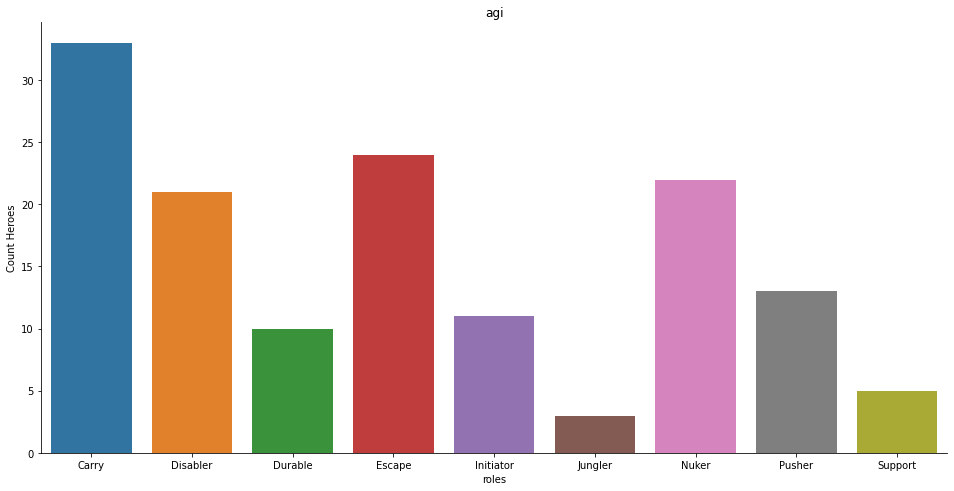

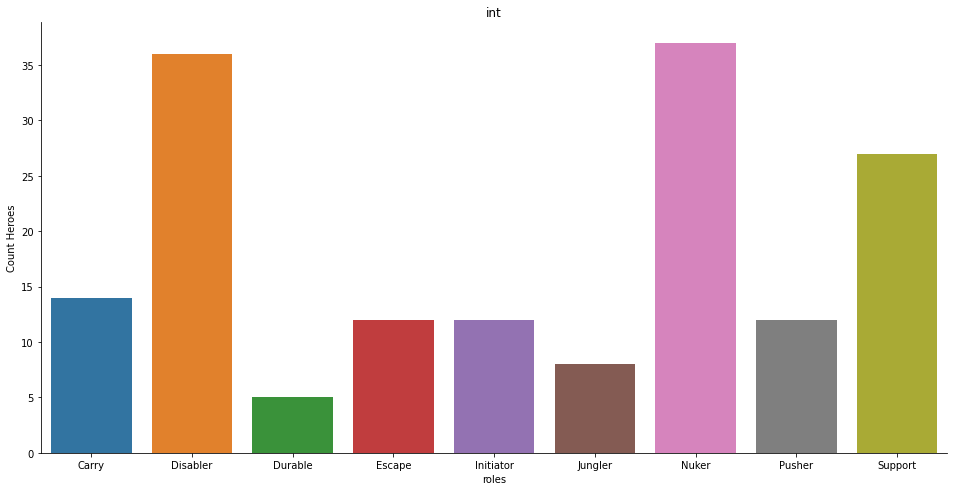

In [184]:
Attr_list = list(set(df_explode['primary_attr']))
for i, Attr in enumerate(Attr_list):
    df_roles = df_explode[['primary_attr', 'roles']].loc[(df_explode['primary_attr'] == Attr)].value_counts().reset_index().rename(columns = {'primary_attr' : 'Primary Attribute' , 0 : 'Сount Heroes'}).sort_values(by='roles')
    role_schedule = sns.catplot(x="roles", y="Сount Heroes", data=df_roles, kind="bar").fig.set_size_inches(15,7)
    plt.title(Attr)

## Третья часть

- Среди героев с основным атрибутом INT(Интеллект) преобладают роли: 'Disabler', 'Nuker', 'Support'.
- Среди героев с основным атрибутом AGI(Ловкость) преобладают роли: 'Carry', 'Disabler', 'Escape', 'Nuker'.
- Среди героев с основным атрибутом STR(Сила) преобладают роли: 'Disabler', 'Durable', 'Initiator', 'Nuker'.

- Роли 'Disabler' и 'Nuker' очень часто встречаются у героев со всеми основными атрибутами.

- Роль 'Jungler' самая не распространенная 